# **Data Wrangling**


## <b> Agenda </b>

In this session, we will cover the following concepts with the help of a business use case:
* Data acquisition
* Different methods for data wrangling:
 
    * Merge datasets
    * Concatenate datasets
    * Identify unique values
    * Drop unnecessary columns
    * Check the dimension of the dataset
    * Check the datatype of the dataset
    * Check datatype summary
    * Treat missing values
    * Validate correctness of the data in primary level if applicable

## **What Is Data Wrangling?**

Data wrangling is the process of converting and formating data from its raw form to usable format further down the data science pipeline.

## **What Is the Need for Data Wrangling?**

Without feeding proper data into a model, one cannot expect a model that is dependable and gives higher accuracy. 

# Scenario 1

### <b> Problem Statement </b>
 
You are a junior data scientist and you are assigned a new task to perform data wrangling on a set of datasets. The datasets have many ambiguities. You have to identify those and apply different data wrangling techniques to get a dataset for further usage.

#### <b> Dataset </b>

- Download the `rental_bike_descr, rental_bike_season, and final_rental_bike_dataset` from Course Resources and upload the datasets to the lab

#### **Data Dictionary**


**Attribute Information:**


* date = date of the ride  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
            2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

### **Import libraries**

- Pandas is a high-level data manipulation tool

- NumPy is used for working with multidimensional arrays

In [1]:
import pandas as pd
import numpy as np

In [2]:
print(pd.show_versions())

/usr/local/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal



INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.7.6.final.0
python-bits      : 64
OS               : Linux
OS-release       : 4.4.0-210-generic
Version          : #242-Ubuntu SMP Fri Apr 16 09:57:56 UTC 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.1.5
numpy            : 1.21.5
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 22.0.3
setuptools       : 41.2.0
Cython           : 0.29.16
pytest           : 5.4.1
hypothesis       : 5.8.0
sphinx           : 2.4.4
blosc            : 1.9.0
feather          : None
xlsxwriter       : 1.2.8
lxml.etree       : 4.5.0
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.1
IPython          : 7.13.0
pandas_datareader: None
bs4              : 4.8.2
bottleneck       : 1.3.2
f

### **Load the first dataset**

In [3]:
dataset_1 = pd.read_csv('rental_bike_descr.csv')

#### **Observations**:
- We have to upload the dataset in the file explorer on the left panel of your lab

- We are reading the file through the dataset_1 variable

- The file is in CSV format

- We use the **`pd.read_csv()`** function to read a CSV file

- We provide the exact path of the file within the round bracket **`()`**

### **Check the type of dataset**

- Execute the below command to understand type of data we are having

In [4]:
type(dataset_1)

pandas.core.frame.DataFrame

#### **Observations:**

- The result shows that the dataset is DataFrame

- DataFrame is a tabular structure consisting of rows and columns

## **Shape of the dataset**

In [5]:
dataset_1.shape

(610, 10)

#### **Observation**:

- The `dataset_1` has 610 rows and 10 columns.

### **Print first 5 rows of the dataset**

In [6]:
dataset_1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,1,0,False,6,1,0.24
1,2,01-01-2011,1,0,1,1,False,6,1,0.22
2,3,01-01-2011,1,0,1,2,False,6,1,0.22
3,4,01-01-2011,1,0,1,3,False,6,1,0.24
4,5,01-01-2011,1,0,1,4,False,6,1,0.24


#### **Observation**:

- The **'dataset_1.head()'** function displays only the initial five rows of the dataset.

### **Load the second dataset**

- Use the function carefully since it is an excel file

In [7]:
dataset_2 = pd.read_excel('rental_bike_season.xlsx')

### **Shape of the dataset**

In [8]:
dataset_2.shape

(610, 8)

#### **Observation:**

* The result shows that `dataset_2` has 610 rows and 8 columns.

### **Print first 5 rows of the dataset**

In [9]:
dataset_2.head()

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0,3,13,16
1,1,2,0.2727,0.80,0.0,8,32,40
2,2,3,0.2727,0.80,0.0,5,27,32
3,3,4,0.2879,0.75,0.0,3,10,13
4,4,5,0.2879,0.75,0.0,0,1,1


#### **Observation:**
- We can see a column named `unnamed:0`, which is not in the data dictionary. Let's remove it.

### **Drop the column**

In [10]:
dataset_2 = dataset_2.drop(['Unnamed: 0'], axis=1)

### **Lets check the shape of the dataset again after the drop**

In [11]:
dataset_2.shape

(610, 7)

#### **Observation:**

- We had 8 columns before the drop.

- When we check the shape of the file after the drop, we see that the column `Unnamed: 0` has been dropped

### **Top 5 rows of the dataset**

- Let's check the dataset_2 again

In [12]:
dataset_2.head()

,instant,atemp,hum,windspeed,casual,registered,cnt
0,1,0.2879,0.81,0.0,3,13,16
1,2,0.2727,0.80,0.0,8,32,40
2,3,0.2727,0.80,0.0,5,27,32
3,4,0.2879,0.75,0.0,3,10,13
4,5,0.2879,0.75,0.0,0,1,1


#### **Observation:**

- dataset_2 does not have `Unnamed: 0` column

### **Merge the datasets**

- We have two datasets. They are dataset_1 and dataset_2

- As both datasets have one common column 'instant', let's merge the datasets on that column

- We are going to save the resultant data inside the **combined_data** as shown below

In [13]:
combined_data = pd.merge(dataset_1, dataset_2, on='instant')

### **Check the shape of combined dataset**

In [14]:
combined_data.shape

(610, 16)

#### **Observation:**

- The shape of the combined_data has 610 rows and 16 columns 

### **Top 5 rows of the combined dataset**

In [15]:
combined_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,False,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,False,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,False,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,False,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,False,6,1,0.24,0.2879,0.75,0.0,0,1,1


### **Load the third dataset**

### **Import the dataset**

In [18]:
dataset_3 = pd.read_csv('final_rental_bike_dataset.csv')

### **Check the shape of the dataset**

In [19]:
dataset_3.shape

(390, 16)

### **Top 5 rows of the dataset**

In [20]:
dataset_3.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,29-01-2011,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,29-01-2011,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,29-01-2011,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,29-01-2011,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,29-01-2011,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2


### **Bottom 15 rows of the dataset**

- Just like the `head` function, the `tail` function is used to see the bottom rows of the dataset

- If you want to see the specific number of rows, then specify the number inside the **`bracket ()`** as shown below

In [21]:
dataset_3.tail(15)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
375,995,14-02-2011,1,0,2,2,False,1,1,0.36,0.3333,0.40,0.2985,0,2,2
376,996,14-02-2011,1,0,2,3,False,1,1,0.34,0.3182,0.46,0.2239,1,1,2
377,997,14-02-2011,1,0,2,4,False,1,1,0.32,0.3030,0.53,0.2836,0,2,2
378,998,14-02-2011,1,0,2,5,False,1,1,0.32,0.3030,0.53,0.2836,0,3,3
379,999,14-02-2011,1,0,2,6,False,1,1,0.34,0.3030,0.46,0.2985,1,25,26
380,1000,14-02-2011,1,0,2,7,False,1,1,0.34,0.3030,0.46,0.2985,2,96,98
381,611,28-01-2011,1,0,1,16,False,5,1,0.22,0.2727,0.80,0.0000,10,70,80
382,612,28-01-2011,1,0,1,17,False,5,1,0.24,0.2424,0.75,0.1343,2,147,149
383,613,28-01-2011,1,0,1,18,False,5,1,0.24,0.2273,0.75,0.1940,2,107,109
384,614,28-01-2011,1,0,1,19,False,5,2,0.24,0.2424,0.75,0.1343,5,84,89


#### **Observation:**

- The bottom 15 rows of the dataset_3 is shown above, as we mention 15 inside the bracket ()

- Here, we can see that the rows are not sorted well according to the `instant` number. Let's resolve it.

### **Sort values of a column**

- To sort the values per our will, we use the **`sort_values`** function and in the square brackets, we specify the name of the column by which we want to sort, as shown below

In [22]:
dataset_3 = dataset_3.sort_values(by=['instant'])

- Let's check head and tail to verify the sort operation

In [23]:
dataset_3.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
381,611,28-01-2011,1,0,1,16,False,5,1,0.22,0.2727,0.80,0.0000,10,70,80
382,612,28-01-2011,1,0,1,17,False,5,1,0.24,0.2424,0.75,0.1343,2,147,149
383,613,28-01-2011,1,0,1,18,False,5,1,0.24,0.2273,0.75,0.1940,2,107,109
384,614,28-01-2011,1,0,1,19,False,5,2,0.24,0.2424,0.75,0.1343,5,84,89
385,615,28-01-2011,1,0,1,20,False,5,2,0.24,0.2273,0.70,0.1940,1,61,62


In [24]:
dataset_3.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
376,996,14-02-2011,1,0,2,3,False,1,1,0.34,0.3182,0.46,0.2239,1,1,2
377,997,14-02-2011,1,0,2,4,False,1,1,0.32,0.3030,0.53,0.2836,0,2,2
378,998,14-02-2011,1,0,2,5,False,1,1,0.32,0.3030,0.53,0.2836,0,3,3
379,999,14-02-2011,1,0,2,6,False,1,1,0.34,0.3030,0.46,0.2985,1,25,26
380,1000,14-02-2011,1,0,2,7,False,1,1,0.34,0.3030,0.46,0.2985,2,96,98


### **Concatenate the `combine_data` with `dataset_3`**

- Let's concatenate both DataFrame combined_data and dataset_3 into a single DataFrame using the **`concat`** function, as shown below
- Store the final DataFrame inside the `final_data` variable

In [25]:
final_data = pd.concat([combined_data, dataset_3])

### **Check the shape of the new dataset**

In [26]:
final_data.shape

(1000, 16)

#### **Observation:**

- Now, the `final_data` has 1000 rows and 16 columns



### **Let's diplay the columns of the `final_data` DataFrame**

In [27]:
final_data = final_data.rename(columns={'dteday': 'date', 'yr': 'year', 'mnth':'month','hr':'hour',
                                        'weathersit':'weather', 'hum':'humidity', 'cnt':'count'})

In [28]:
final_data.head()

,instant,date,season,year,month,hour,holiday,weekday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2011,1,0,1,0,False,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,False,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,False,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,False,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,False,6,1,0.24,0.2879,0.75,0.0,0,1,1


### **Data types of different column values**

In [29]:
final_data.dtypes

instant         int64
date           object
season          int64
year            int64
month           int64
hour            int64
holiday          bool
weekday         int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object





#### **Observations:**

- We can see that the majority of our data columns are of type int64. They are therefore 64-bit integers. Some of the columns are of the type float64, which implies that they have decimals in them. However, only the date column has an object type, indicating that it contains strings.

### **Check for null values**

- Execute the given command to check the unknown values in the DataFrame


In [30]:
final_data.isna()

,instant,date,season,year,month,hour,holiday,weekday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
378,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
379,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### **Observation:**

- The **`isna()`** function returns DataFrame of Boolean values that are True for null values  

- In a huge dataset, the code given above is not going to help

- We do not get enough idea of the null values by looking at the given tabular dataset

- The next line of code is more convenient in this case.

In [31]:
final_data.isna().sum(axis=0)

instant        0
date           0
season         0
year           0
month          0
hour           0
holiday        0
weekday        0
weather        0
temp           0
atemp         11
humidity       0
windspeed      0
casual         0
registered     0
count          0
dtype: int64

#### **Observations:**

- The `isna().sum(axis=0)` function provides a clear picture of the number of null values in a DataFrame

-  In the given result, we can see that the `atemp` column has 11 null values

### **Let's check the percentage of the rows with missing value**

- We are performing this operation to determine whether the NA value rows can be dropped off or not so that we cannot deviate from our desired model

In [32]:
percentage_of_missing_values = (final_data['atemp'].isna().sum(axis=0)/final_data.shape[0])*100
percentage_of_missing_values

1.0999999999999999

#### **Observations:**

- We divide the number of null values by the shape of the DataFrame to get the percentage of missing values.

- Since the percentage is 1, it is very less. Usually, the industry practice allows us to drop rows up to 30%. So, we can drop the rows with missing values.

### **Drop the rows with missing values**

- We will use the `dropna` function to drop the null value rows

In [33]:
final_data = final_data.dropna(axis=0)
final_data.shape

(989, 16)

#### **Observations:**

- We can see that the shape of the DataFrame reduced to 989 from 1000. It shows that the missing value rows have been wiped off.

- In further lessons of this course, we'll see different methods to treat missing values.

### **Now, let's again check the missing value count after the drop**

In [34]:
final_data.isna().sum(axis=0)

instant       0
date          0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

#### **Perform sanity checks on the dataset**

- It verifies the logical correctness of the data points

### **Check if `casual` + `registered` is always equal to `count`**

In [35]:
np.sum(final_data['casual'] + final_data['registered'] - final_data['count'])

0

### **Month values should be in the range of 1-12**

- We will use the `unique()` function to find the elements of an array

In [36]:
np.unique(final_data.month)

array([1, 2])

### **Hour should be in the range of 1-24**

In [37]:
np.unique(final_data.hour)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

### **Print the statistical summary of the data**

- We will use the `describe()` function to see the stastical summary of the dataset

In [38]:
print(final_data.describe())

           instant  season   year       month        hour     weekday  \
count   989.000000   989.0  989.0  989.000000  989.000000  989.000000   
mean    505.622851     1.0    0.0    1.315470   11.753286    2.991911   
std     286.274765     0.0    0.0    0.464938    6.891129    2.084727   
min       1.000000     1.0    0.0    1.000000    0.000000    0.000000   
25%     259.000000     1.0    0.0    1.000000    6.000000    1.000000   
50%     506.000000     1.0    0.0    1.000000   12.000000    3.000000   
75%     753.000000     1.0    0.0    2.000000   18.000000    5.000000   
max    1000.000000     1.0    0.0    2.000000   23.000000    6.000000   

          weather        temp       atemp    humidity   windspeed      casual  \
count  989.000000  989.000000  989.000000  989.000000  989.000000  989.000000   
mean     1.479272    0.204712    0.211958    0.581769    0.194609    4.921132   
std      0.651085    0.077789    0.076703    0.187706    0.129225    7.666231   
min      1.000000 

**`Note: We have seen almost all the methods of data wrangling, now let's see explicitly outlier detection and removing`**

# Secnario 2

### **Import the Libraries**

- Apart from the Pandas and NumPy, this time we are also calling Scikit-learn

- Scikit-learn (sklearn) is an open-source module that has some inbuilt datasets, like boston and iris 

- Each dataset has a corresponding function used to load the dataset

- These functions follow the same format: “load_DATASET()”, where DATASET refers to the name of the dataset

- We are importing two datasets from `sklearn.datasets` in the cell below

In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston, load_iris

### **Load the Data**

- Since these datasets are directly importing from Scikit Learn, the load functions (such as load_boston()) do not return data in the tabular format 

- The data is stored in the form of keys (words) and values (definition) like the dictionary structure

- Let’s load the dataset and store it in a variable called boston

- Now, we are going to call the keys for boston dataset `print(boston.keys())`

In [40]:
boston = load_boston()

#Find the dic keys
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

#### **Observations**:

- We get the keys such as data, target, feature_names, DESCR, and filename

- The first two keys 'data' and 'target' has the only actual data, rest serve a descriptive purpose

- `data` has all the input features of the dataset in a NumPy array and `target` has the output feature based on which we do the prediction. `target` is in the NumPy array 

- `feature_names` has all the column names of the dataset in a NumPy array and `DESCR` is the description of the dataset `filename` that has the file path in CSV format

### **Find features name**

- Let's see the columns in the dataset

In [41]:
#Find features and target
x = boston.data
y = boston.target

columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### **Description of dataset**

In [42]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### **Let's convert the array to a DataFrame i.e into tabular structure**

- Since both data and target are in a NumPy array, we need to convert it to a DataFrame

In [43]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df["MEDV"] = y
boston_df_o = boston_df
print(boston_df.shape)
print(boston_df_o.shape)

(506, 14)
(506, 14)


#### **Observation:**

- `boston_df` has 506 rows and 14 columns

In [44]:
print(boston_df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [45]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### **Outlier Detection - Univarite - Boxplot**

- Boxplot is a graphical method for representing the values in the data

- It shows how the values are spread and skewed

<AxesSubplot:>

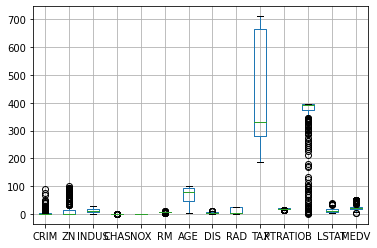

In [46]:
boston_df.boxplot()

#### **Observations:**

- Since the values are different from each other, it is not right to put every column in the same scale of measurement

#### **Let's import the libraries like matplotlib and seaborn**

- Matplotlib is a data visualizing and graphical plotting library for Python 

- Seaborn is also a data visualization library built on top of Matplotlib, which is used for making statistical graphics

<AxesSubplot:xlabel='DIS'>

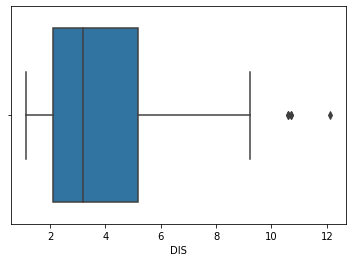

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.boxplot(x=boston_df['DIS'])

#### **IQR (Interquartile range ) technique for outlier treatment**

In [48]:
def outlier_treatment(col):
    sorted(col)
    Q1,Q3 = np.percentile(col , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

#### **Observations:**

- In this technique, we divide our dataset under percentiles like 25th  and 75th of a sample

- After that, we find the IQR between these two percentiles

- Now, to remove the outliers, we calculate the lower and upper range by using the given formula

- All the values which are beyond these ranges are considered outliers and must be removed

In [49]:
lower_range,upper_range = outlier_treatment(boston_df['DIS'])
print("Lower Range:",lower_range)
print("Upper Range:",upper_range)

Lower Range: -2.5322000000000005
Upper Range: 9.820800000000002


#### **Observation:**

- We have calculated the lower and upper ranges for `DIS` feature of our `boston_df`

In [50]:
lower_boston_df = boston_df[boston_df["DIS"].values < lower_range]
lower_boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


### **Let us show the values which are beyond upper and lower range in our dataset**

In [51]:
upper_boston_df = boston_df[boston_df["DIS"].values > upper_range]
upper_boston_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49,24.1
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79,18.6
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,384.46,4.50,30.1
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57,20.6


#### **Observations:**

- There are no rows that are lesser than the lower range, but there are five rows that are greater than our upper range

In [52]:

lower_outliers = lower_boston_df.value_counts().sum(axis=0)
upper_outliers = upper_boston_df.value_counts().sum(axis=0)
total_outliers = lower_outliers + upper_outliers

print("Total Number of Outliers:",total_outliers)

Total Number of Outliers: 5


#### **Observation:**

- With the given code, we are summing up the total number of outlier rows

### **Let us list down the row numbers that contain outliers:**

In [53]:

lower_index = list(boston_df[ boston_df['DIS'] < lower_range ].index)

upper_index = list(boston_df[ boston_df['DIS'] > upper_range ].index)

total_index = list(lower_index + upper_index)

print(total_index)


[351, 352, 353, 354, 355]


### **Drop the outlier rows**

In [54]:
print("Shape Before Dropping Outlier Rows:", boston_df.shape)

boston_df.drop(total_index, inplace = True)

print("Shape After Dropping Outlier Rows:", boston_df.shape)

Shape Before Dropping Outlier Rows: (506, 14)
Shape After Dropping Outlier Rows: (501, 14)


#### **Observation:**

- In the given code, we checked the shape of the dataset before and after dropping outliers rows

- You can see that the rows before dropping the outliers were 506 and after dropping it became 501. Thus, we have successfully dropped the unwanted rows

In [55]:
print(boston_df.mean())

CRIM         3.648951
ZN          10.738523
INDUS       11.229521
CHAS         0.069860
NOX          0.556123
RM           6.285898
AGE         68.996008
DIS          3.723699
RAD          9.602794
TAX        408.964072
PTRATIO     18.444910
B          356.428443
LSTAT       12.716667
MEDV        22.534930
dtype: float64


### **Let's check the skewness of the data**

- Skewness is a way of checking the outliers' position in the dataset. If the data is right-skewed, it means that most of the outliers are at the right side of the distribution and vice-versa.

In [56]:
boston_df.skew(axis = 0, skipna = True)

CRIM       5.199083
ZN         2.333143
INDUS      0.286236
CHAS       3.384961
NOX        0.724482
RM         0.399880
AGE       -0.624705
DIS        0.843752
RAD        0.989519
TAX        0.662769
PTRATIO   -0.814678
B         -2.871741
LSTAT      0.894723
MEDV       1.105009
dtype: float64

<AxesSubplot:>

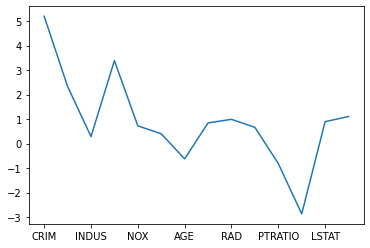

In [57]:
boston_df.skew(axis = 0, skipna = True).plot()

## **Correlation**

- Correlation is a statistical term that refers to how close two variables are to form a linear relationship with one another.

- High correlation features are more linearly dependent and therefore have almost the same effect on the dependent variable. When two features have a high correlation, we can drop one of them.

In [58]:
pearsoncorr = boston_df.corr(method='pearson')
pearsoncorr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.197045,0.405070,-0.057085,0.419441,-0.220593,0.350953,-0.389244,0.624689,0.582689,0.293911,-0.384430,0.454222,-0.389168
ZN,-0.197045,1.000000,-0.522068,-0.036798,-0.506471,0.329664,-0.556961,0.632905,-0.307898,-0.313254,-0.424341,0.174996,-0.405733,0.374678
INDUS,0.405070,-0.522068,1.000000,0.059823,0.759689,-0.398559,0.637736,-0.710742,0.593388,0.723164,0.395794,-0.356755,0.599738,-0.489142
CHAS,-0.057085,-0.036798,0.059823,1.000000,0.088550,0.090968,0.083442,-0.095687,-0.009062,-0.036855,-0.120921,0.049561,-0.056617,0.175463
NOX,0.419441,-0.506471,0.759689,0.088550,1.000000,-0.307300,0.726982,-0.779518,0.609673,0.669190,0.197554,-0.379776,0.586774,-0.431362
RM,-0.220593,0.329664,-0.398559,0.090968,-0.307300,1.000000,-0.247881,0.223962,-0.211945,-0.292789,-0.352913,0.129013,-0.618199,0.694797
AGE,0.350953,-0.556961,0.637736,0.083442,0.726982,-0.247881,1.000000,-0.750649,0.452882,0.507512,0.275461,-0.272692,0.598830,-0.383383
DIS,-0.389244,0.632905,-0.710742,-0.095687,-0.779518,0.223962,-0.750649,1.000000,-0.504962,-0.552740,-0.264611,0.300387,-0.498097,0.265689
RAD,0.624689,-0.307898,0.593388,-0.009062,0.609673,-0.211945,0.452882,-0.504962,1.000000,0.911417,0.471650,-0.443783,0.486202,-0.383126
TAX,0.582689,-0.313254,0.723164,-0.036855,0.669190,-0.292789,0.507512,-0.552740,0.911417,1.000000,0.465659,-0.441691,0.543021,-0.468504


#### **Observations:**


*   The correlation coefficient value lies between -1 to +1.
*   The attributes closer to 1 are more positively correlated.
*   Values close to -1 are more negatively correlated.
*   We can see more detail about correlation in Heatmap with a better visualization.


## **Pearson Coefficient**

- The Pearson coefficient is a measure of the intensity and direction of a linear relationship between two variables that allows no assumptions about causality. It represents correlation rather than causation and has a scale of +1 to -1, with +1 representing a positive correlation, -1 representing a negative correlation, and 0 representing no relationship.

### **Pearson Correlation Calculation**

We use **method = pearson** for the **boston_df.corr** for calculating the pearson coefficient of correlation.

<AxesSubplot:>

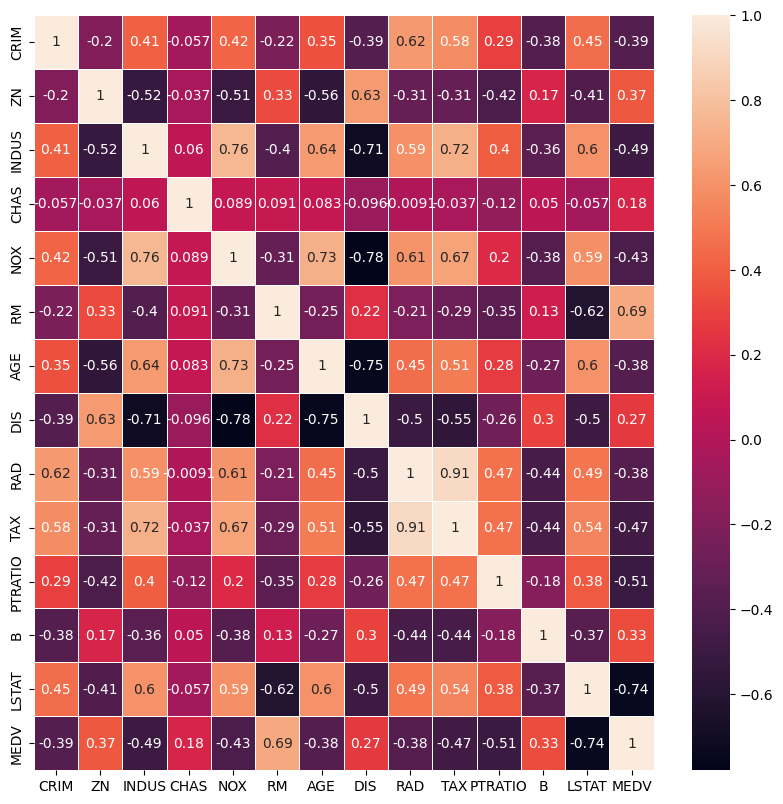

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize= (10,10), dpi=100)
#sns.heatmap(boston_df.corr(), annot=True)
sns.heatmap(pearsoncorr,
xticklabels=pearsoncorr.columns,
yticklabels=pearsoncorr.columns,
annot=True,
linewidth=0.5)

## **Heatmap Observations:**

- Each square represents the correlation between the variables on each axis, ranging from -1 to +1.

- There is no linear relationship between the two variables when the values are close to zero.

- The attributes closer to 1 are more positively correlated. If one increases, so does the other, and the closer they are to 1, the stronger their relationship.

- Values close to -1 are more negatively correlated. When one increases, the other decreases, and the closer they are to -1, the weaker their relationship.

- The diagonals are all 1 (light peach in color), as the squares are correlating each variable to itself (so it's a perfect correlation).

- For the others, the larger the number and brighter the color, the stronger is the correlation between the two variables.

- Since the same two variables are paired together in squares of the diagonal, the plot is therefore symmetrical around it.

In [60]:
#Correlation with output variable
cor_target = abs(pearsoncorr["MEDV"]) #Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.694797
PTRATIO    0.508040
LSTAT      0.740998
MEDV       1.000000
Name: MEDV, dtype: float64

## **Relative feature observations**

- The features RM, PTRATIO, and LSTAT are strongly correlated with the output variable MEDV (target variable) per above analysis. 

- As a result, we will remove all other features except these. 

- However, one of the assumptions of linear regression is that the independent variables are not correlated to one another. 

- If these variables are correlated with one another, we can hold just one and discard the others.

In [61]:
print(boston_df[["LSTAT","PTRATIO"]].corr())
print()
print(boston_df[["RM","PTRATIO"]].corr())
print()
print(boston_df[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.381429
PTRATIO  0.381429  1.000000

               RM   PTRATIO
RM       1.000000 -0.352913
PTRATIO -0.352913  1.000000

             RM     LSTAT
RM     1.000000 -0.618199
LSTAT -0.618199  1.000000


## **Correlation observations:**

- From the above analysis, it is visible that the variables LSTAT and RM are highly correlated with each other (-0.618199). Hence, we will keep only one variable and drop the other. We will keep LSTAT since its correlation with MEDV is higher than that of RM.

- After **dropping RM**, we are left with two features, **LSTAT** and **PTRATIO**. These are the final features given by Pearson correlation.

In [62]:
boston_df.drop(columns = ["RM"], inplace = True)

In [63]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### **Multivariate Outlier Analysis**



*   We will draw a scatter plot between `INDUS` and `TAX` columns to check how the values are placed
*   We will see the dependency of one cloumn over other
*   We will also see that some of the results do not match the patterns that others do, which we refer to as outliers



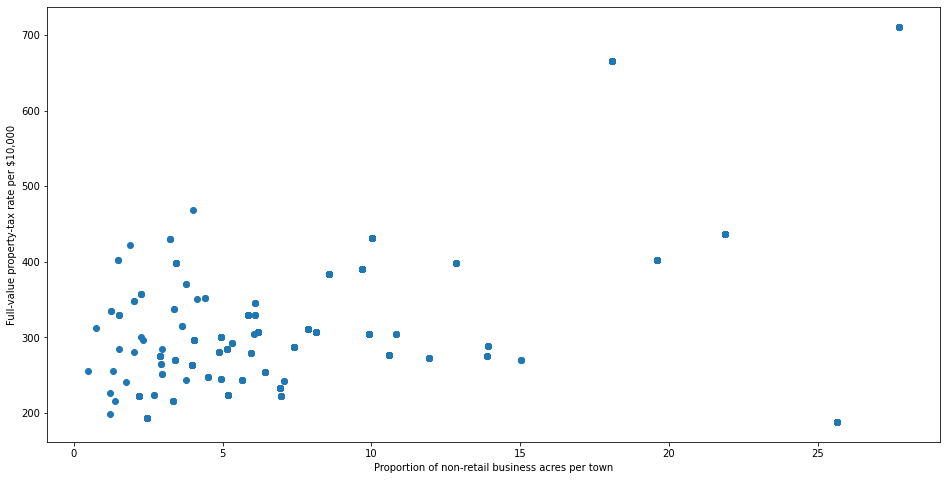

In [64]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

### **Outliers detection using Z-Score**

- Z-score indicates how many standard deviations away a data point is

- Standard deviation measures the amount of variation of a set of values from its mean

- We can drop the rows which lie beyond our threshold, i.e., z=3

In [65]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.4221648  0.32239913 1.30704424 ... 0.44172158 1.08363554 0.15884649]
 [0.41973215 0.47677497 0.60952577 ... 0.44172158 0.5009655  0.10136743]
 [0.41973447 0.47677497 0.60952577 ... 0.39730009 1.21669721 1.31896687]
 ...
 [0.41585544 0.47677497 0.10264644 ... 0.44172158 0.9911927  0.14800424]
 [0.41019626 0.47677497 0.10264644 ... 0.404067   0.87353817 0.05799844]
 [0.41740265 0.47677497 0.10264644 ... 0.44172158 0.67744729 1.15306535]]


In [66]:
z.shape

(501, 13)

### **We will now print the rows whose z value is greater than the threshold**

In [67]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57,  65,  66, 102, 141, 142, 152, 154, 155, 160, 162,
       163, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 208, 209,
       210, 211, 212, 216, 218, 219, 220, 221, 222, 234, 236, 254, 255,
       256, 269, 273, 274, 276, 277, 282, 283, 283, 284, 286, 290, 291,
       292, 347, 348, 351, 352, 353, 358, 359, 364, 365, 367, 368, 369,
       375, 393, 399, 400, 405, 405, 406, 407, 407, 409, 409, 410, 411,
       413, 413, 414, 418, 419, 420, 421, 422, 422, 424, 426, 431, 432,
       433, 440, 445, 449, 450, 451, 452, 461]), array([ 1,  1,  1,  1,  1, 10, 11,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  1,  1,  1,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  1,
        1,  1,  1,  1,  3,  3,  3,  3,  3,  3,  3,  3, 11, 11,  0,  0,  0,
        0,  0, 10, 10, 10, 11,  0, 11, 10, 10,  0, 10, 10, 10, 10, 10, 10,
        0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]))


In [68]:
print(z[55][1])

3.519095537179635


**Removing Outliers**

- Taking only those rows which lies under our threshold

In [69]:
boston_df_o = boston_df_o[(z < 3).all(axis=1)]

In [70]:
boston_df.shape

(501, 13)

In [71]:
boston_df_o.shape

(408, 13)

In [72]:
boston_df_o1 = boston_df

**Now, let us use IQR (Interquartile range ) technique once again to remove outliers** 

In [73]:
Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.61046
ZN          12.50000
INDUS       12.91000
CHAS         0.00000
NOX          0.17100
AGE         48.40000
DIS          3.02850
RAD         20.00000
TAX        387.00000
PTRATIO      2.80000
B           20.91000
LSTAT        9.97000
MEDV         8.20000
dtype: float64


In [74]:
IQR["CRIM"]

3.61046

In [75]:
boston_df_o.shape

(408, 13)

In [76]:
# Custom function to find and remove outliers based on each column
def multi_outlier_treatment(data):
    columns = data.drop(columns=["MEDV"]).columns  
    # Getting the names of each row except the target row for Analysis
    Q1 = boston_df_o1.quantile(0.25)
    Q3 = boston_df_o1.quantile(0.75)
    IQR = Q3 - Q1
    row_index_list = list()
    print()

    for col in columns:
      lower_range = Q1[col] - (1.5 * IQR[col])
      upper_range = Q3[col] + (1.5 * IQR[col])

      lower_data_df = data[data[col].values < lower_range]
      upper_data_df = data[data[col].values > upper_range]

      lower_outliers = lower_data_df.value_counts().sum(axis=0)
      upper_outliers = upper_data_df.value_counts().sum(axis=0)
      total_outliers = lower_outliers + upper_outliers
      print("Total Number of Outliers in "+str(col)+" column:",total_outliers)

      lower_index = list(data[ data[col] < lower_range ].index)
      upper_index = list(data[ data[col] > upper_range ].index)
      total_index = list(lower_index + upper_index)

      row_index_list = list(row_index_list + total_index)

    row_index_list = list(set(row_index_list))
    row_index_list.sort()
    total_rows_count = len(row_index_list)
    print()
    print("Total number of unique rows to delete:",total_rows_count)
    print()
    print("Unique rows to delete:\n", row_index_list)
    print()
    return data.drop(row_index_list)


### **Let's drop all the rows which do not lie between the upper and lower range**

- We are going to drop 120 rows from our dataset that contains outliers

In [77]:
print("Shape before dropping outlier rows:", boston_df_o.shape)
boston_df_o = multi_outlier_treatment(boston_df_o)
print("Shape after dropping outlier rows:", boston_df_o.shape)

Shape before dropping outlier rows: (408, 13)

Total Number of Outliers in CRIM column: 42
Total Number of Outliers in ZN column: 34
Total Number of Outliers in INDUS column: 0
Total Number of Outliers in CHAS column: 0
Total Number of Outliers in NOX column: 0
Total Number of Outliers in AGE column: 0
Total Number of Outliers in DIS column: 0
Total Number of Outliers in RAD column: 0
Total Number of Outliers in TAX column: 0
Total Number of Outliers in PTRATIO column: 12
Total Number of Outliers in B column: 44
Total Number of Outliers in LSTAT column: 0

Total number of unique rows to delete: 120

Unique rows to delete:
 [18, 25, 27, 32, 34, 39, 40, 54, 118, 134, 145, 146, 151, 153, 156, 165, 167, 168, 169, 170, 187, 188, 189, 190, 191, 192, 193, 194, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 275, 278, 285, 287, 288, 289, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 331, 332, 341, 343, 344, 349, 350, 366, 367, 371, 375, 376, 377, 378, 379, 381, 382, 384, 385, 3

### **Conclusion**
- The completed dataset, `boston_df_o`, can now be utilised to construct a model. As the dataset is so well-defined, the model will be more accurate.

In [78]:
print(boston_df_o.isna().sum(axis=0))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
